# Random Forest

## Task:
Use the Glass dataset and apply the Random forest model

## Exploratory Data Analysis (EDA):

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
!pip install --upgrade openpyxl

In [4]:
import openpyxl
print(openpyxl.__version__)

3.1.5


In [5]:
df = pd.read_excel('./glass.xlsx', sheet_name = 1)

In [6]:
df1 = df.copy()
df1.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

#### Check the shape of the dataset

In [7]:
print("Shape of the dataset:", df1.shape)

Shape of the dataset: (214, 10)


#### Data types

In [8]:
df1.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

### Summary statistics of numerical columns

In [9]:
df1.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

### Numerical data distribution

In [10]:
num_col = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

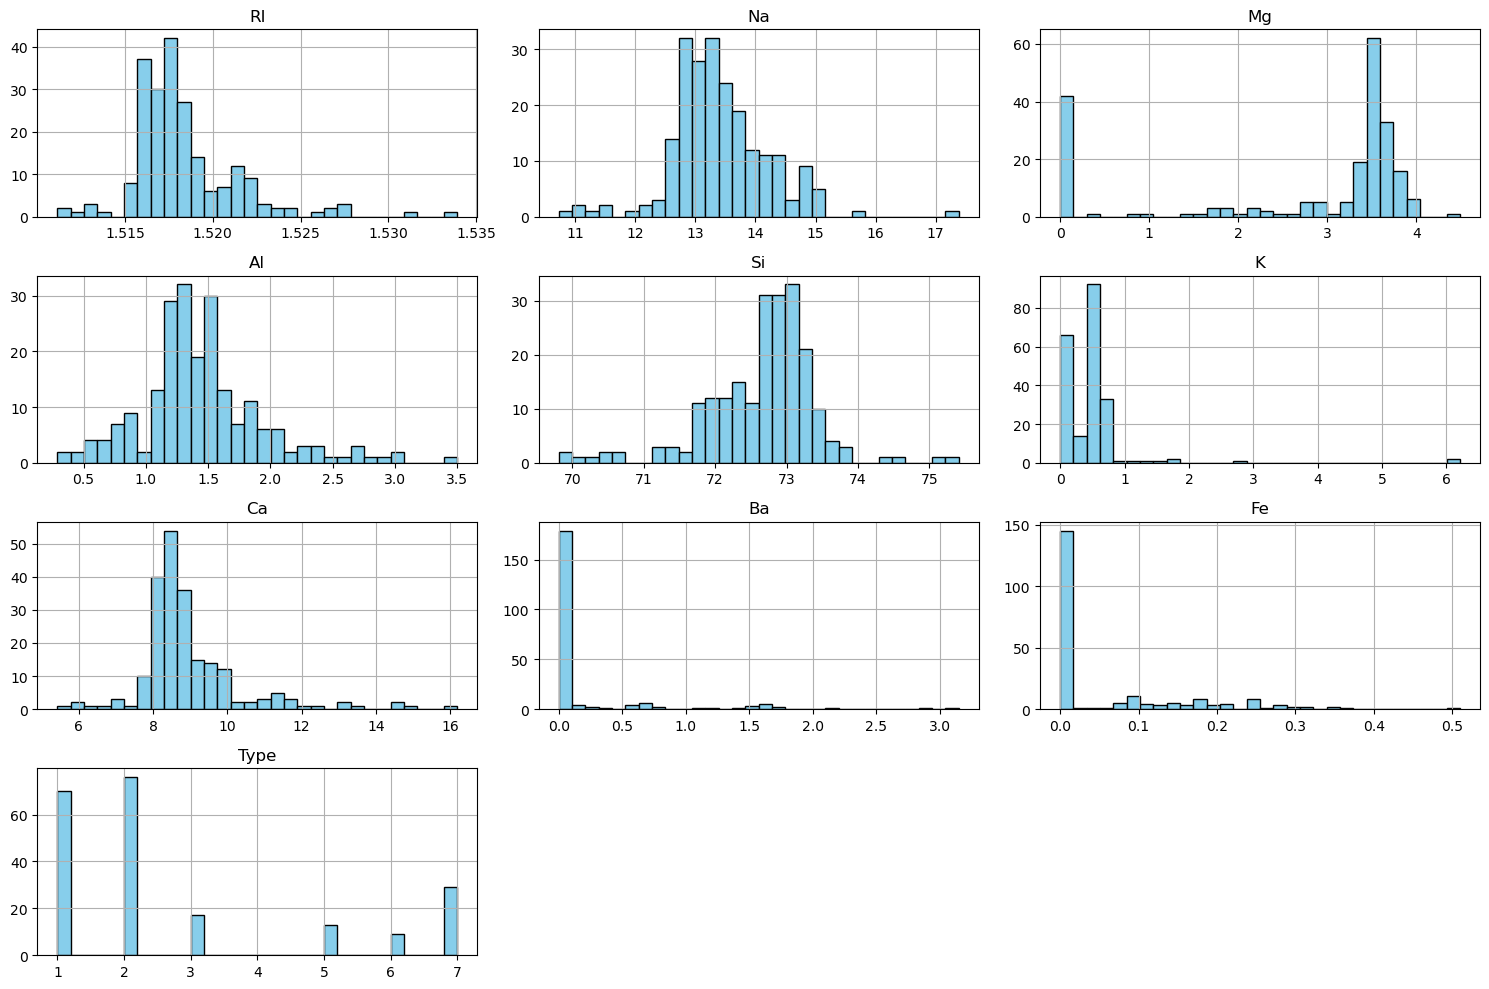

In [11]:
# histogram for each numerical column
df1.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

### Categorical data distribution

In [12]:
cat_col = ['Type']

In [13]:
# bar plot for each categorical column
fig = go.Figure()
for column in cat_col:
    counts = df1[column].value_counts()
    fig.add_trace(go.Bar(x=counts.index, y=counts.values, name=column))

fig.update_layout(
    title="Distribution of Categorical Data",
    xaxis_title="Categories",
    yaxis_title="Number of Samples"
)

fig.show()

### Duplicate values

In [14]:
df1.duplicated().sum()

1

In [15]:
df1[df1.duplicated(keep=False)]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
38  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [16]:
df1.drop_duplicates(inplace=True)

In [17]:
df1.duplicated().sum()

0

#### -> Dropped one duplicate value

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


### Boxplot for outlier detection - Selective outlier removal on numerical columns 

plt.figure(figsize=(10,8))
sns.boxplot(data=df1[num_col])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [19]:
from scipy.stats import iqr

#### Function to detect and remove outliers

In [20]:
def remove_outliers_iqr(data2, cols, factor=1.5):
    mask = pd.Series(True, index=data2.index)
    for col in cols:
        Q1 = data2[col].quantile(0.25)
        Q3 = data2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask &= data2[col].between(lower, upper)
    return data2[mask]

In [21]:
data_cleaned = remove_outliers_iqr(df1, num_col)

In [22]:
print(f"Rows before outlier removal: {df1.shape[0]}, after: {data_cleaned.shape[0]}")

Rows before outlier removal: 213, after: 135


#### Checking for inconsistencies in the data

In [23]:
print("Before outliers removal:")
df1['Type'].value_counts()

Before outliers removal:


Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [24]:
print("After outliers removal:")
data_cleaned['Type'].value_counts()

After outliers removal:


Type
1    59
2    54
3    15
6     5
5     2
Name: count, dtype: int64

#### NOTE:

Before outlier removal, the dataset had 213 records with six class types, including minority classes like Type 7. After removal, the total records reduced to 135, with Type 7 entirely eliminated and others like Type 5 and 6 significantly reduced. This led to class imbalance and loss of category diversity. Since Random Forest handles outliers well, removing them was unnecessary and may harm model performance.

# Data Visualization:

### Histograms of numerical features

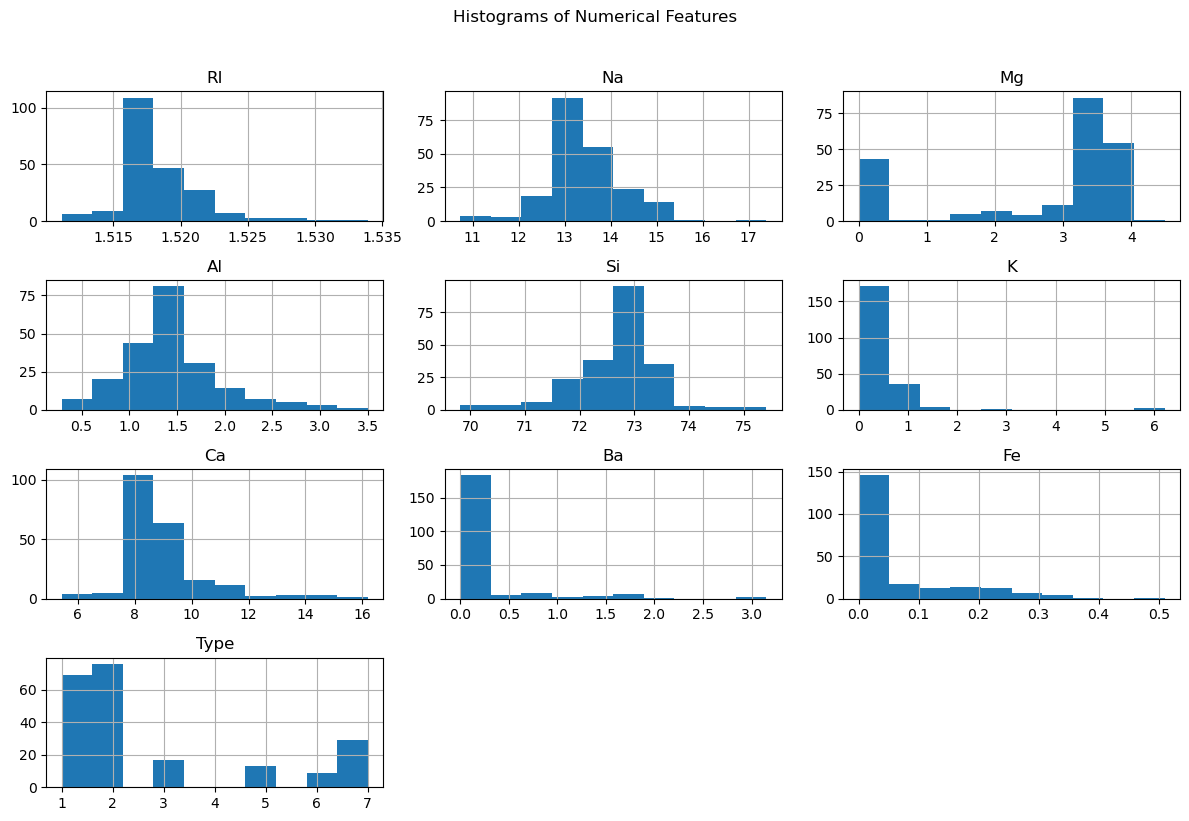

In [25]:
df1.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

### Note:

From the histograms, we can observe the distributions of each numerical feature. Some features appear to be normally distributed (e.g., refractive index), while others show skewed distributions (e.g., calcium oxide content).

### Pair plot of numerical features

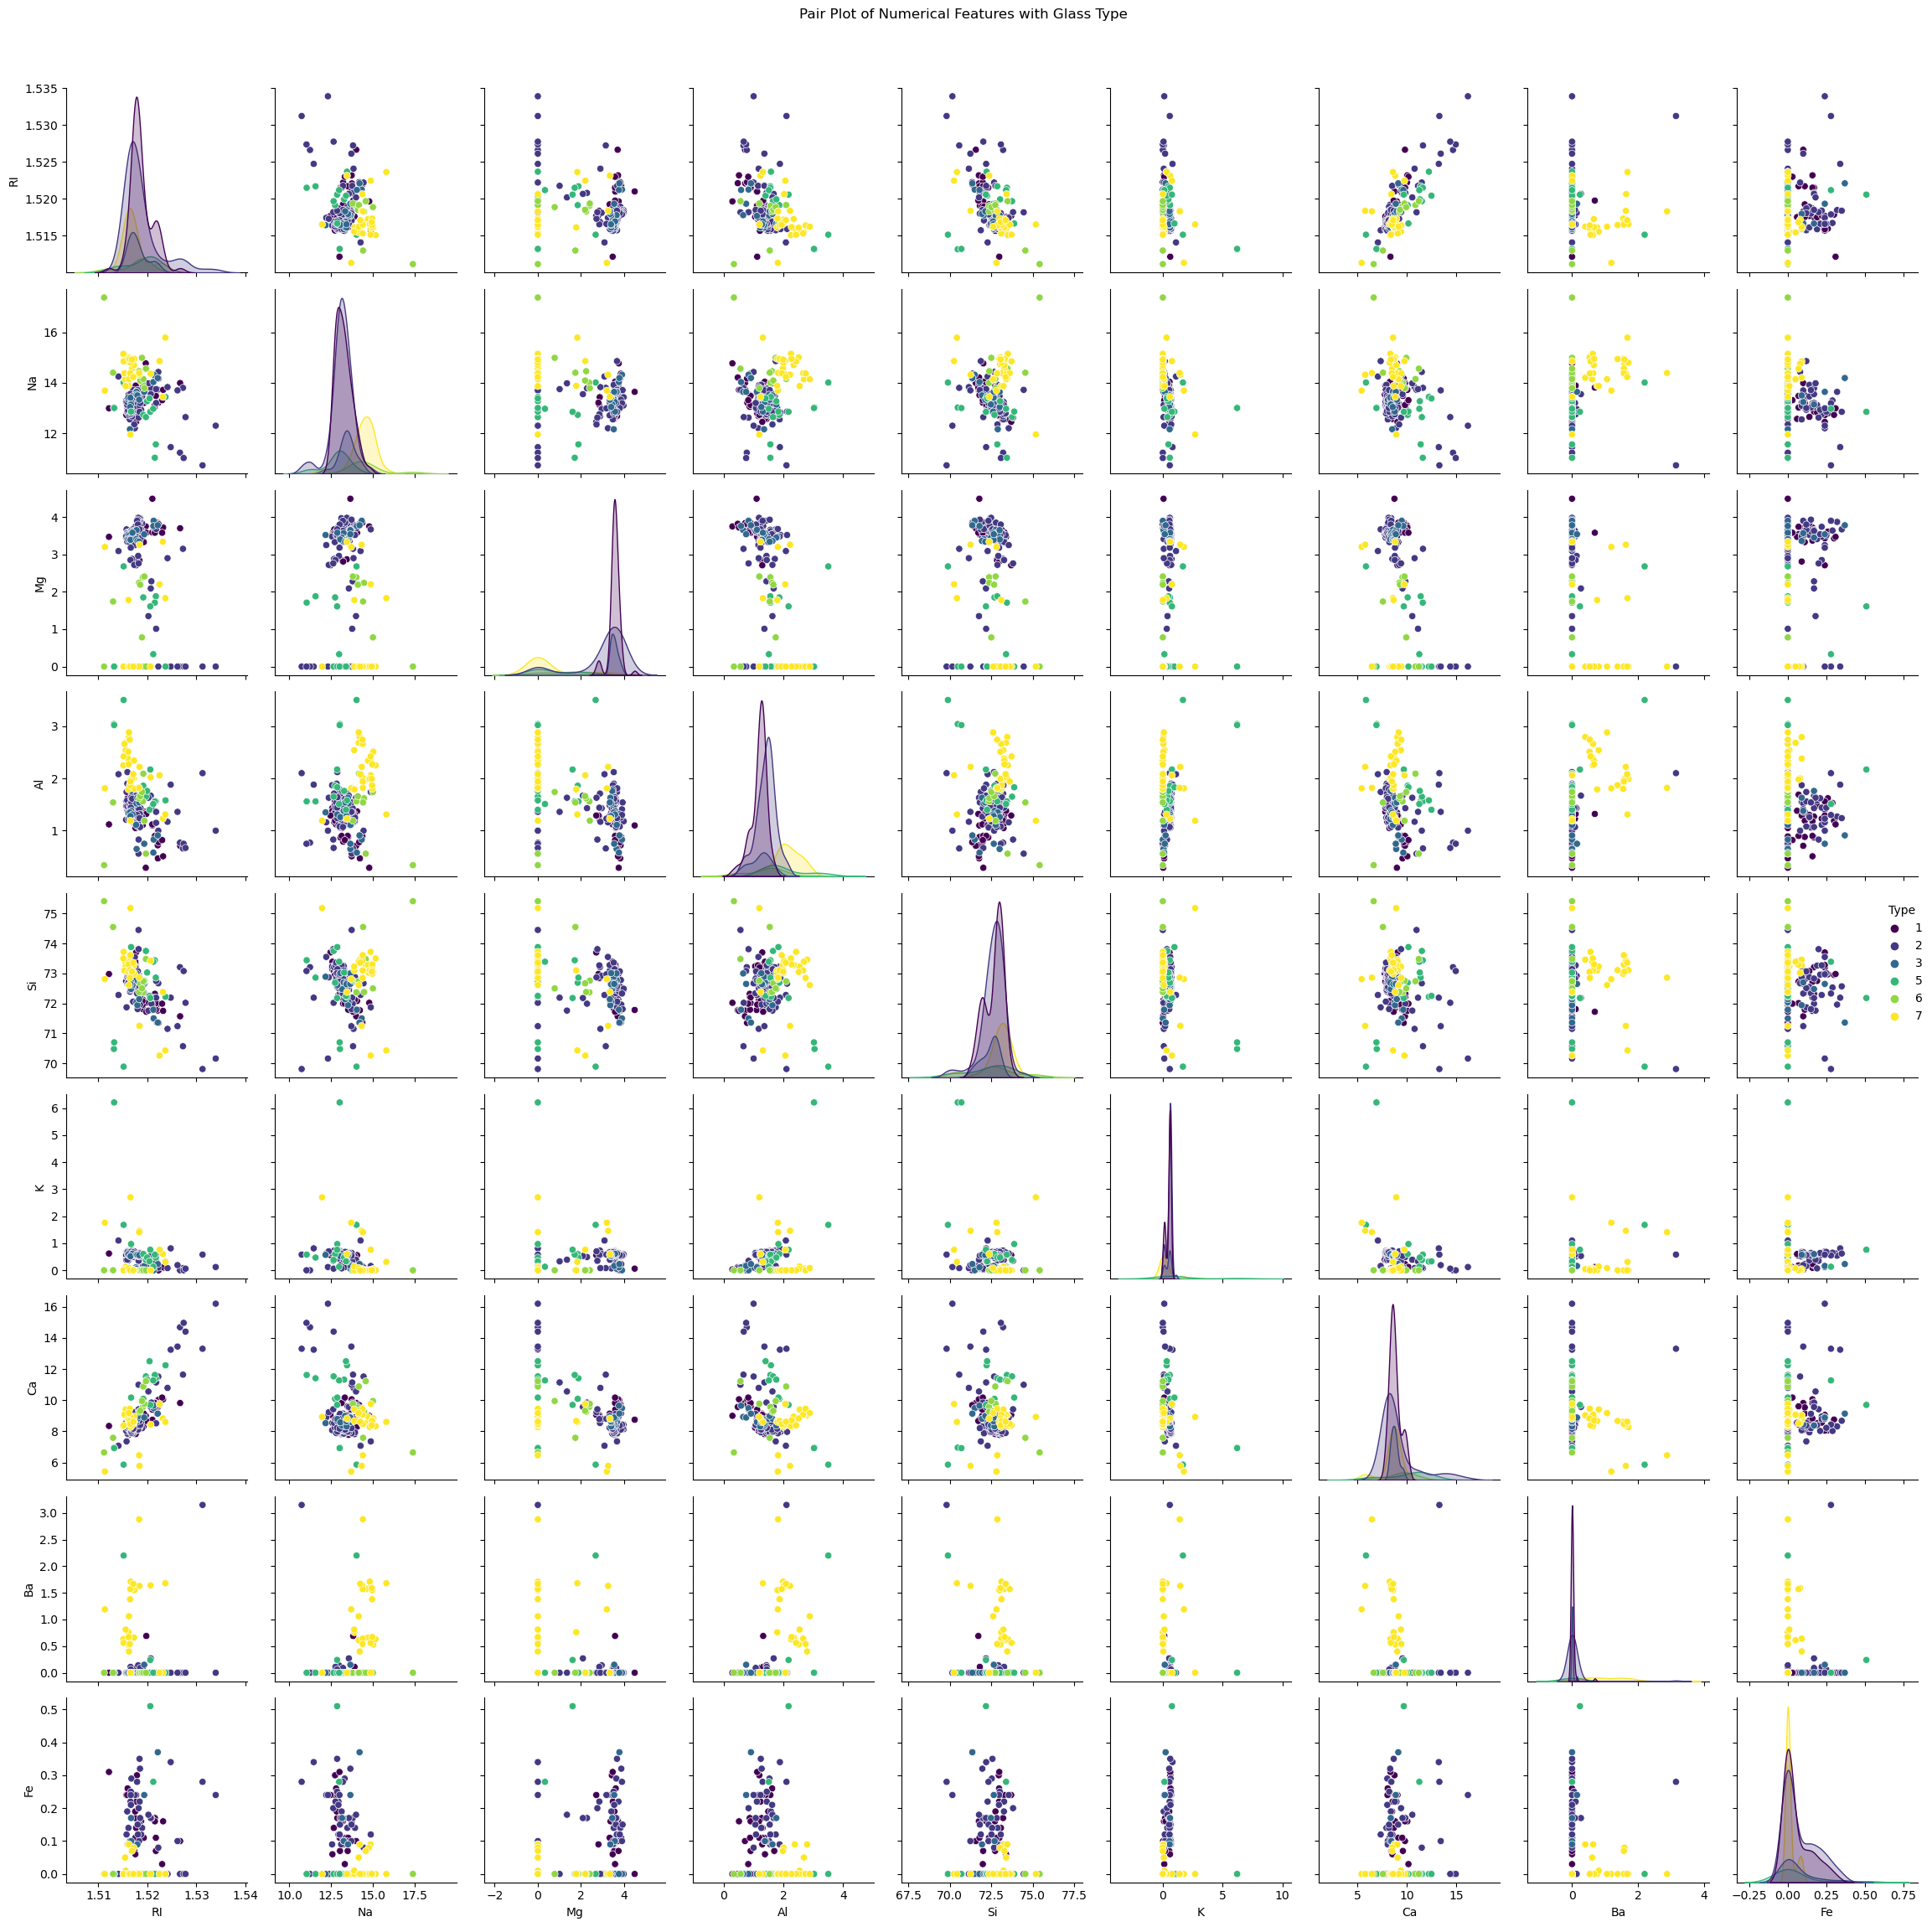

In [26]:
sns.pairplot(df1, diag_kind='kde', hue='Type', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features with Glass Type', y=1.02)
plt.tight_layout()
plt.show()

#### Note:
The pair plot allows us to visualize pairwise relationships between numerical features. We can observe patterns such as positive correlations (e.g., between refractive index and calcium oxide content) or negative correlations (e.g., between refractive index and magnesium oxide content).


# Data Preprocessing

### Missing values: 

In [27]:
df1.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### -> No missing values found

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


It appears that there are no categorical variables in the Glass dataset, as all columns have numerical data types. Therefore, we don't need to apply encoding techniques like one-hot encoding to convert categorical variables into numerical format.

### Scale the data 
-> using Standard scaler to standardize to ensure that all features are on a similar scale

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
X = df1.drop(columns=['Type'])
y = df1['Type']

In [31]:
# Feature scaling (standardization)
scaler = StandardScaler()

In [32]:
X_scaled = scaler.fit_transform(X)

### SMOTE technique - to handle the imbalance in the data

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(random_state=42)

In [35]:
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [36]:
# Class distribution after resampling
pd.Series(y_resampled).value_counts()

Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64

#### -> Use SMOTE to handle the imbalanced data by oversampling the minority class

### Train and test split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Random Forest Model 

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_cls = RandomForestClassifier(random_state=42)

In [41]:
# Train the Random Forest classifier
rf_cls.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Predict on the test set
y_pred = rf_cls.predict(X_test)

### Model Evaluation

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [44]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.94      0.89      0.92        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



In [45]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  1,  2,  0,  0,  0],
       [ 2, 17,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0, 18]], dtype=int64)

In [46]:
# Precision
precision = precision_score(y_test, y_pred, average='weighted')

In [47]:
# Recall
recall = recall_score(y_test, y_pred, average='weighted')

In [48]:
# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

In [49]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

In [50]:
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Evaluation Metrics:
Accuracy: 0.9456521739130435
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


### Interpretation on the Random Forest model

Accuracy: 94.57%

Random Forest is an ensemble learning method based on decision trees. It builds multiple decision trees and merges their predictions to improve accuracy.
With an accuracy of 94.57%, Random Forest performed quite well on the dataset.
Random Forest is robust to overfitting and noise in the data due to its ensemble nature, which helps in achieving higher accuracy.

### ROC CURVE

In [51]:
from sklearn.metrics import roc_curve, auc

In [52]:
# Get predicted probabilities
y_probabilities = rf_cls.predict_proba(X_test)

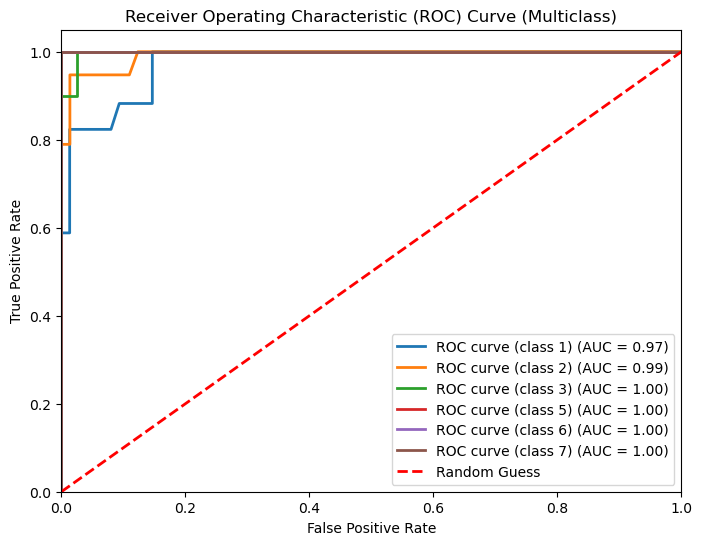

In [53]:
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(rf_cls.classes_)):
    fpr, tpr, _ = roc_curve(y_test == rf_cls.classes_[i], y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class {0}) (AUC = {1:0.2f})'.format(rf_cls.classes_[i], roc_auc))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random Guess')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Multiclass)')
plt.legend(loc="lower right")
plt.show()

## Bagging and Boosting Methods

In [54]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

## Bagging classifier with Random Forest base estimator

In [55]:
bagging_rf_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                                          n_estimators=100, random_state=42)

In [56]:
# Train the Bagging classifier
bagging_rf_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [57]:
# Predict on the test set 
y_pred_bagging_rf = bagging_rf_classifier.predict(X_test)

### Evaluate the Bagging with Random Forest model

In [58]:
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
precision_bagging_rf = precision_score(y_test, y_pred_bagging_rf, average='weighted')
recall_bagging_rf = recall_score(y_test, y_pred_bagging_rf, average='weighted')
f1_bagging_rf = f1_score(y_test, y_pred_bagging_rf, average='weighted')

In [59]:
print("\nEvaluation Metrics for Bagging with Random Forest:")
print("Accuracy:", accuracy_bagging_rf)
print("Precision:", precision_bagging_rf)
print("Recall:", recall_bagging_rf)
print("F1-score:", f1_bagging_rf)


Evaluation Metrics for Bagging with Random Forest:
Accuracy: 0.9456521739130435
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


### Interpretation for Bagging classifier model:

Accuracy: 94.57%

Bagging (Bootstrap Aggregating) is a technique that uses multiple models trained on different subsets of the training data and combines their predictions.

Bagging with Random Forest involves using the Random Forest algorithm within the bagging framework.

The accuracy obtained with Bagging and Random Forest is the same as that of the Random Forest alone, indicating that bagging did not significantly improve the model's performance in this case.

### ROC Curve

In [60]:
from sklearn.preprocessing import label_binarize

In [61]:
# Convert y_test to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=range(len(np.unique(y_test))))

In [62]:
# Get predicted probabilities
y_probabilities_bagging_rf = bagging_rf_classifier.predict_proba(X_test)

In [63]:
# Calculate the ROC curve and AUC for Bagging with Random Forest
fpr_bagging_rf = dict()
tpr_bagging_rf = dict()
roc_auc_bagging_rf = dict()

for i in range(len(np.unique(y_test))):
    fpr_bagging_rf[i], tpr_bagging_rf[i], _ = roc_curve(y_test_one_hot[:, i], y_probabilities_bagging_rf[:, i])
    roc_auc_bagging_rf[i] = auc(fpr_bagging_rf[i], tpr_bagging_rf[i])

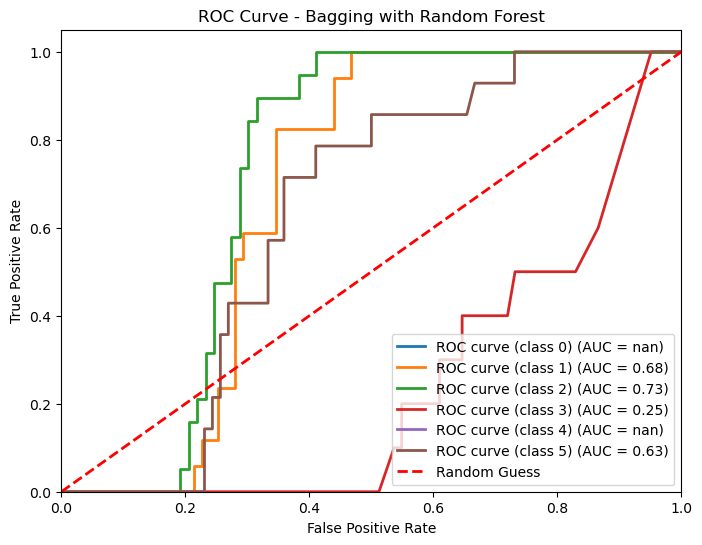

In [64]:
# Plot ROC curve for Bagging with Random Forest
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_bagging_rf[i], tpr_bagging_rf[i], lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc_bagging_rf[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random Guess')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging with Random Forest')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting classifier

In [65]:
# Initialize 
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

In [66]:
# Train the Gradient Boosting classifier
gradient_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
# Predict on the test set 
y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)

### Evaluate the Bagging with Gradient Boosting model

In [68]:
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting, average='weighted')
recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting, average='weighted')
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting, average='weighted')

In [69]:
print("\nEvaluation Metrics for Gradient Boosting:")
print("Accuracy (Gradient Boosting):", accuracy_gradient_boosting)
print("Precision:", precision_gradient_boosting)
print("Recall:", recall_gradient_boosting)
print("F1-score:", f1_gradient_boosting)


Evaluation Metrics for Gradient Boosting:
Accuracy (Gradient Boosting): 0.9239130434782609
Precision: 0.9312116778149387
Recall: 0.9239130434782609
F1-score: 0.9242856142667107


### Interpretation for Gradient Boosting:

Accuracy: 92.39%

Gradient Boosting is another ensemble learning technique that builds multiple weak learners (typically decision trees) sequentially, with each subsequent learner focusing on the errors made by the previous ones.

While Gradient Boosting achieved a slightly lower accuracy compared to Random Forest, it still performed well with an accuracy of 92.39%.

Gradient Boosting tends to be more sensitive to overfitting compared to Random Forest, which might explain the slightly lower accuracy.

### ROC Curve

In [70]:
# Convert y_test to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=range(len(np.unique(y_test))))

In [71]:
# Get predicted probabilities
y_probabilities_gradient_boosting = gradient_boosting_classifier.predict_proba(X_test)

In [72]:
# Calculate the ROC curve and AUC for Gradient Boosting
fpr_gradient_boosting = dict()
tpr_gradient_boosting = dict()
roc_auc_gradient_boosting = dict()

for i in range(len(np.unique(y_test))):
    fpr_gradient_boosting[i], tpr_gradient_boosting[i], _ = roc_curve(y_test_one_hot[:, i], y_probabilities_gradient_boosting[:, i])
    roc_auc_gradient_boosting[i] = auc(fpr_gradient_boosting[i], tpr_gradient_boosting[i])

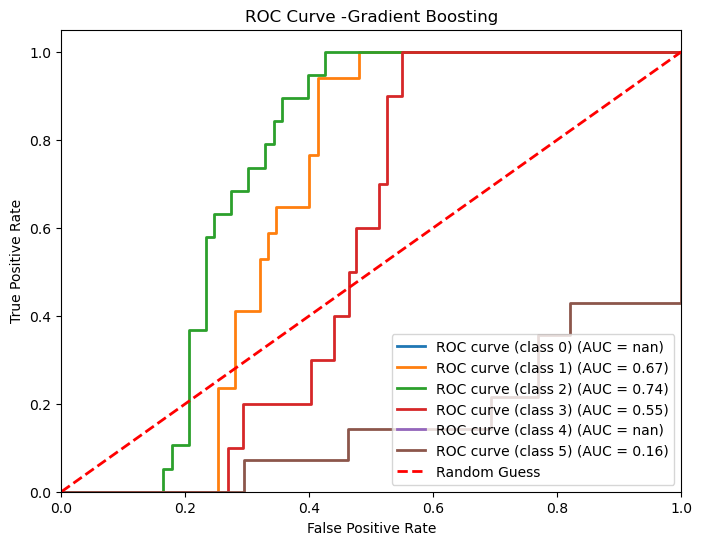

In [74]:
# Plot ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_gradient_boosting[i], tpr_gradient_boosting[i], lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc_gradient_boosting[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random Guess')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

### Insights:
Based on the accuracy results obtained from different ensemble methods:

Both Random Forest and Bagging with Random Forest achieved the same accuracy, suggesting that bagging did not provide additional benefits in this scenario.

Gradient Boosting, while slightly lower in accuracy compared to Random Forest, still produced competitive results.

The choice between these ensemble methods may depend on factors such as computational resources, interpretability, and sensitivity to overfitting.

## Additional Notes:

### 1. Can you explain Bagging and Boosting methods? How are they different from each other?


Both Bagging and Boosting are ensemble learning techniques used to improve the performance of machine learning models by combining multiple weak learners. However, they differ in their approach to building these ensemble models.

### Bagging (Bootstrap Aggregating):

Bagging involves training multiple independent models in parallel, each on a random subset of the training data (with replacement).

These subsets are sampled with replacement from the original training data, so each model sees a slightly different perspective of the data.

The final prediction is typically obtained by averaging the predictions of all individual models (for regression) or by voting (for classification).

Examples of Bagging algorithms include Random Forest and BaggingClassifier.

### Boosting:

Boosting, on the other hand, focuses on building a sequence of models, where each subsequent model learns from the mistakes of its predecessor.

It starts by training a base model on the entire training dataset and then adjusts the weights of misclassified instances to prioritize them in the next iteration.

Subsequent models are trained iteratively, with each new model paying more attention to the instances that were misclassified by the previous models.

The final prediction is typically obtained by weighted averaging of the predictions from all individual models.

Examples of Boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

### Key Differences:

### Training Approach:
Bagging trains multiple models independently in parallel, while Boosting trains models sequentially, with each subsequent model learning from the mistakes of its predecessor.

### Instance Weighting:
Bagging treats all instances equally during training, while Boosting assigns higher weights to misclassified instances to prioritize them in subsequent iterations.

### Final Prediction:
Bagging typically combines predictions by averaging (for regression) or voting (for classification), while Boosting combines predictions by weighted averaging.

### Vulnerability to Overfitting:
Boosting tends to be more susceptible to overfitting compared to Bagging due to its iterative nature, but techniques like early stopping and regularization can mitigate this.

In summary, while both Bagging and Boosting aim to improve model performance through ensemble learning, they differ in their training approach and how they leverage the training data to build the ensemble models.

### 2. How do you handle imbalance in the data?

Handling imbalance in the data is crucial in machine learning tasks, especially in classification problems where one class may dominate the dataset. Here are some common techniques to address class imbalance:

### Resampling Techniques:

#### Oversampling:

Increase the number of instances in the minority class by randomly duplicating them or generating synthetic samples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).

#### Undersampling:

Reduce the number of instances in the majority class by randomly removing samples until the class distribution is balanced.

### Algorithmic Techniques:

#### Class Weighting:

Assign higher weights to instances of the minority class during model training to penalize misclassifications more heavily.

#### Ensemble Methods:

Use ensemble algorithms like Bagging and Boosting with techniques specifically designed to handle class imbalance (e.g., BalancedBaggingClassifier, BalancedRandomForestClassifier).

#### Cost-sensitive Learning:

Adjust the cost function to reflect the imbalance in class distribution, penalizing misclassifications of the minority class more severely.

#### Data-level Techniques:

Collect More Data: If possible, collect more data for the minority class to balance the dataset naturally.

#### Feature Engineering:

Create informative features that help the model distinguish between classes more effectively, reducing the impact of class imbalance.

Choosing the appropriate technique depends on factors such as the severity of class imbalance, dataset size, computational resources, and the specific characteristics of the problem domain.

It's often beneficial to experiment with different approaches to find the most effective solution for a particular dataset.